# Tutorial 1: Basics of CrypTen Tensors

We now have a high-level understanding of how secure MPC works. Through these tutorials, we will explain how to use CrypTen to carry out secure operations on encrypted tensors. In this tutorial, we will introduce a fundamental building block in CrypTen, called a ```CrypTensor```.  ```CrypTensors``` are encrypted ```torch``` tensors that can be used for computing securely on data. 

CrypTen currently only supports secure MPC protocols (though we intend to add support for other advanced encryption protocols). Using the ```mpc``` backend, ```CrypTensors``` act as ```torch``` tensors whose values are encrypted using secure MPC protocols. Tensors created using the ```mpc``` backend are called ```MPCTensors```. We will go into greater detail about ```MPCTensors``` in Tutorial 2. 

Let's begin by importing ```crypten``` and ```torch``` libraries. (If the imports fail, please see the installation instructions in the README.)

In [1]:
import crypten
import torch
from crypten.config import cfg
import timeit
import crypten.communicator as comm
from crypten.config import cfg
import logging
import matplotlib.pyplot as plt

crypten.init()
logging.getLogger().setLevel(logging.INFO)

# comm.get().set_verbosity(True)
# ... do stuff ..
# comm.get().print_communication_stats()

/Users/memo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def print_diff(x, z_enc):
    diff = (x - z_enc.get_plain_text()).abs()
    print("  Diff:", diff.mean(), diff.max())
    # print(diff[:print_terms])
    plt.plot(diff)
num_iters = 1
print_terms = 18

torch.Size([10, 2])
Negative Exponential:
  Exact : tensor([[1.5230e-08, 3.7460e-08],
        [9.2136e-08, 2.2662e-07],
        [5.5739e-07, 1.3710e-06],
        [3.3720e-06, 8.2938e-06],
        [2.0399e-05, 5.0175e-05],
        [1.2341e-04, 3.0354e-04],
        [7.4659e-04, 1.8363e-03],
        [4.5166e-03, 1.1109e-02],
        [2.7324e-02, 6.7206e-02],
        [1.6530e-01, 4.0657e-01]])
  Approx: 1 iterations in 0.003125958999589784 sec.: tensor([[0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [1.5259e-05, 3.0518e-05],
        [9.1553e-05, 2.5940e-04],
        [6.5613e-04, 1.6937e-03],
        [4.2572e-03, 1.0651e-02],
        [2.6611e-02, 6.6162e-02],
        [1.6444e-01, 4.0553e-01]])
  Diff: tensor(0.0002) tensor(0.0010)
  Nexp   : 1 iterations in 0.0056619579991092905 sec.: tensor([[0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+0

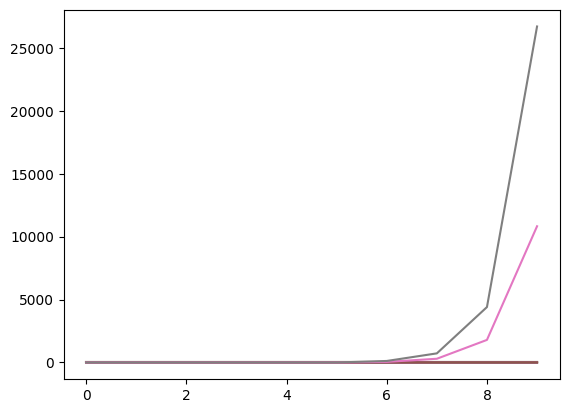

In [3]:
#Construct example input CrypTensor
x = torch.arange(-18, 0, 0.9)
x = x.reshape([10, 2])
print(x.size())
# x = torch.tensor([0.01, 0.5])
x_enc = crypten.cryptensor(x)

print("Negative Exponential:")
print("  Exact :", x.exp()[:print_terms])
with cfg.temp_override({"functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'split', "functions.exp_all_neg": True}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Nexp   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'haar', "functions.exp_all_neg": True}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'bior', "functions.exp_all_neg": True}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)

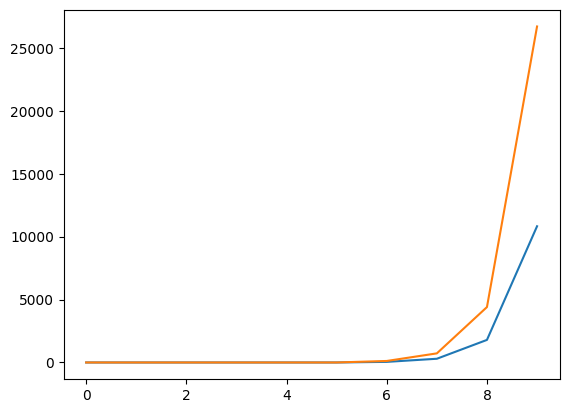

In [4]:
plt.plot(z_enc.get_plain_text())

torch.Size([54])
Exponential:
  Exact : tensor([0.0003, 0.0005, 0.0006, 0.0008, 0.0011, 0.0015, 0.0020, 0.0027, 0.0037,
        0.0050, 0.0067, 0.0091, 0.0123, 0.0166, 0.0224, 0.0302, 0.0408, 0.0550])
  Approx: 1 iterations in 0.00264404200061108 sec.: tensor([0.0003, 0.0004, 0.0005, 0.0007, 0.0010, 0.0014, 0.0019, 0.0025, 0.0035,
        0.0047, 0.0064, 0.0087, 0.0118, 0.0160, 0.0217, 0.0295, 0.0399, 0.0541])
  Diff: tensor(18.3263) tensor(310.0916)
  Haar  : 1 iterations in 0.006209499999386026 sec.: tensor([3.3569e-04, 6.1035e-04, 1.1139e-03, 2.0599e-03, 3.7384e-03, 6.7902e-03,
        1.2482e-02, 2.2614e-02, 4.1595e-02, 7.5317e-02, 1.3638e-01, 2.5087e-01,
        4.5427e-01, 8.3553e-01, 1.5130e+00, 2.7827e+00, 5.0389e+00, 9.1243e+00])
  Diff: tensor(175.4474) tensor(2032.0232)
  Bior  : 1 iterations in 0.0015062920028867666 sec.: tensor([    30,     39,     83,    166,    322,    611,    799,   1672,   3344,
          6479,  12275,  16051,  33602,  67170, 130149, 142815, 322399, 67

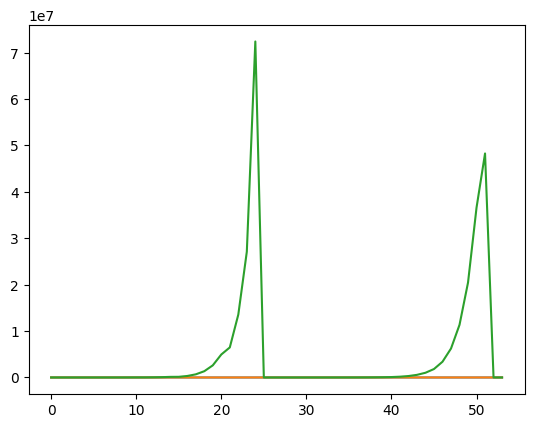

In [5]:
#Construct example input CrypTensor
x = torch.arange(-8, 8, 0.3)
print(x.size())
# x = torch.tensor([0.01, 0.5])
x_enc = crypten.cryptensor(x)

print("Exponential:")
print("  Exact :", x.exp()[:print_terms])
with cfg.temp_override({"functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'haar', "functions.exp_all_neg": False}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'bior', "functions.exp_all_neg": False}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)


Reciprocal:
  Exact : tensor([10.0000,  5.0000,  3.3333,  2.5000,  2.0000,  1.6667,  1.4286,  1.2500,
         1.1111,  1.0000,  0.9091,  0.8333,  0.7692,  0.7143,  0.6667,  0.6250,
         0.5882,  0.5556])
  Approx: 1 iterations in 0.015883333999227034 sec.: tensor([10.0009,  5.0001,  3.3335,  2.5000,  2.0000,  1.6667,  1.4286,  1.2500,
         1.1111,  1.0000,  0.9091,  0.8333,  0.7693,  0.7143,  0.6667,  0.6250,
         0.5883,  0.5556])
  Diff: tensor(5.4541e-05) tensor(0.0009)
  Haar  : 1 iterations in 0.02825233299881802 sec.: tensor([10.0397,  4.9708,  3.3464,  2.4975,  1.9922,  1.6677,  1.4262,  1.2518,
         1.1106,  0.9980,  0.9094,  0.8325,  0.7699,  0.7141,  0.6658,  0.6251,
         0.5878,  0.5559])
  Diff: tensor(0.0011) tensor(0.0397)
  Bior  : 1 iterations in 0.004746582999359816 sec.: tensor([1056150082,  140698317, -253612717, -126744310,     124096,     108674,
             93249,      81390,      73094,      64798,      59703,      54608,
             50344

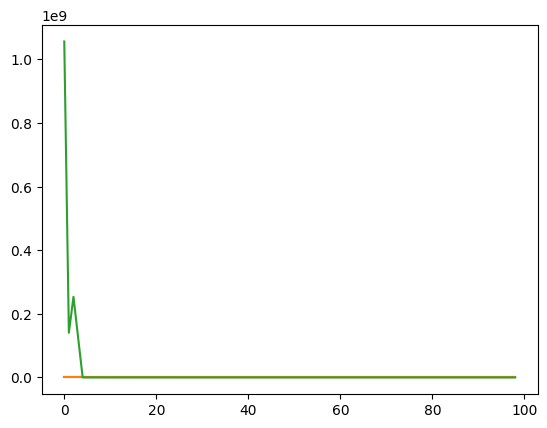

In [6]:
# x = torch.tensor([0.00005, 0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]) # , 5, 10, 50, 100 , 500, 1000, 5000, 10000, 50000])
x = torch.arange(0.1, 10, 0.1)
x_enc = crypten.cryptensor(x)

print("\nReciprocal:")
print("  Exact :", x.reciprocal()[:print_terms])
with cfg.temp_override({"functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.reciprocal(), z_enc)
# with cfg.temp_override({"functions.reciprocal_method": 'NR', "functions.exp_method": 'limit', "functions.reciprocal_initial": 1}):
#     start1 = timeit.default_timer()
#     for _ in range(num_iters):
#         z_enc = x_enc.reciprocal()  # Private
#     print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
#     print_diff(x.reciprocal(), z_enc)
with cfg.temp_override({"functions.reciprocal_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.reciprocal(), z_enc)
with cfg.temp_override({"functions.reciprocal_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.reciprocal(), z_enc)


Logarithm (LUT faster):
  Exact : tensor([-4.6052, -3.9120, -3.5066, -3.2189, -2.9957, -2.8134, -2.6593, -2.5257,
        -2.4079, -2.3026, -2.2073, -2.1203, -2.0402, -1.9661, -1.8971, -1.8326,
        -1.7720, -1.7148])
  Approx: 1 iterations in 0.018930875001387903 sec.: tensor([17862316, 32605681, 42099927, 50679568, 54409620, 58834437, 58963121,
        60647120, 58635790, 58575742, 55410909, 54292814, 51195338, 50777907,
        47721592, 47020918, 43618699, 42800891])
  Diff: tensor(1.5524e+09) tensor(1.2255e+10)
  Haar  : 1 iterations in 0.020778707999852486 sec.: tensor([-337811, -247218, -247218, -212935, -190670, -190670, -174113, -160918,
        -160918, -149945, -140552, -140552, -132339, -132339, -125042, -118478,
        -118478, -112512])
  Diff: tensor(86940.0156) tensor(337806.4062)
  Bior  : 1 iterations in 0.019307292001030874 sec.: tensor([-359452, -229474, -225916, -211133, -196152, -184272, -174357, -165404,
        -157797, -150929, -144548, -138961, -133709, -

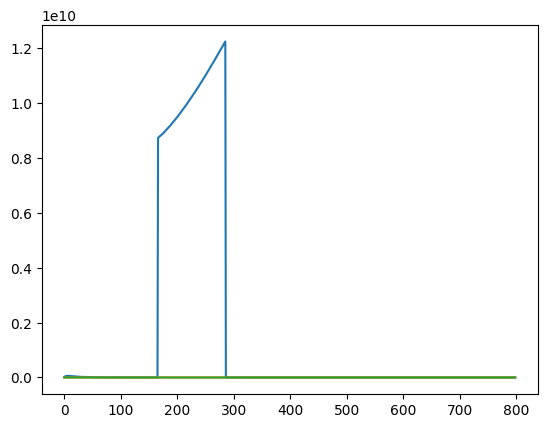

In [7]:
x = torch.arange(0.01, 8, 0.01)
x_enc = crypten.cryptensor(x)

print("\nLogarithm (LUT faster):")
print("  Exact :", x.log()[:print_terms])
with cfg.temp_override({"functions.log_method": 'iter'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)
with cfg.temp_override({"functions.log_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)
with cfg.temp_override({"functions.log_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)

torch.Size([790])

Square Root: (LUT faster)
  Exact : tensor([0.3162, 0.3317, 0.3464, 0.3606, 0.3742, 0.3873, 0.4000, 0.4123, 0.4243,
        0.4359, 0.4472, 0.4583, 0.4690, 0.4796, 0.4899, 0.5000, 0.5099, 0.5196])
  Approx: 1 iterations in 0.00922799999898416 sec.: tensor([ 6459349959949886038,   140196588470836384, -3389123993988022544,
        -6728274240150314066,  9054611277011807015, -7468470414165427150,
        -2838648700970736899,  8398534836026360581, -2351875220684892660,
         6111101048149228020,  2020305419071927136, -7280280886754298402,
         3801068579190666761,  5629703896697243463, -6638692246381552976,
          379491889895555072, -8491156825607698469,   840725085962471290])
  Diff: tensor(4.4354e+18) tensor(9.2196e+18)
  Haar   : 1 iterations in 0.017239875000086613 sec.: tensor([20881, 22431, 22431, 23880, 23880, 25247, 26543, 26543, 27778, 28961,
        28961, 30098, 31193, 31193, 32251, 33275, 33275, 34268])
  Diff: tensor(124865.1641) tensor(185270.17

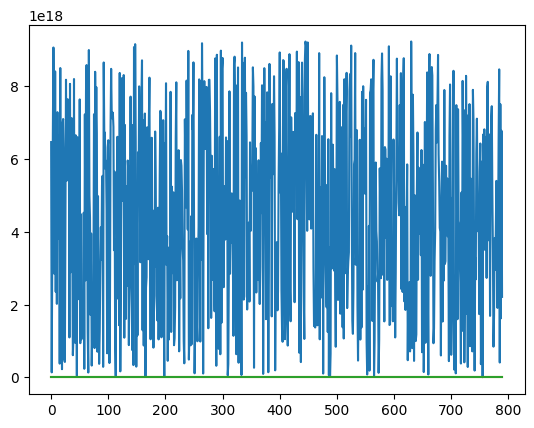

In [8]:
x = torch.arange(0.1, 8, 0.01)
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nSquare Root: (LUT faster)")
print("  Exact :", x.sqrt()[:print_terms])
with cfg.temp_override({"functions.sqrt_method": 'NR', "functions.inv_sqrt_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sqrt(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'haar', "functions.inv_sqrt_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'bior', "functions.inv_sqrt_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt(), z_enc)

torch.Size([790])

Inverse Square Root: (LUT faster)
  Exact : tensor([3.1623, 3.0151, 2.8868, 2.7735, 2.6726, 2.5820, 2.5000, 2.4254, 2.3570,
        2.2942, 2.2361, 2.1822, 2.1320, 2.0851, 2.0412, 2.0000, 1.9612, 1.9245])
  Approx: 1 iterations in 0.010918332998699043 sec.: tensor([ 2464117261476546246,  -509262191187531900,  1704907657374473042,
        -2428163913706838558,   473464792217848113, -1605232416422770301,
         2109185264251481321,    88508748832477569,  2214160540280776551,
         1089427997367654780,  2137989208314937120,   965907731162464207,
        -2961809770552710087,  2988958981748518695,     -422093861036467,
         3823579245984346487,  1711122203398626293,    55302258448771827])
  Diff: tensor(2.3124e+18) tensor(4.6095e+18)
  Haar   : 1 iterations in 0.01593170799969812 sec.: tensor([205787, 191543, 191543, 179902, 179902, 170156, 161840, 161840, 154637,
        148317, 148317, 142715, 137702, 137702, 133184, 129083, 129083, 125339])
  Diff: tensor(417

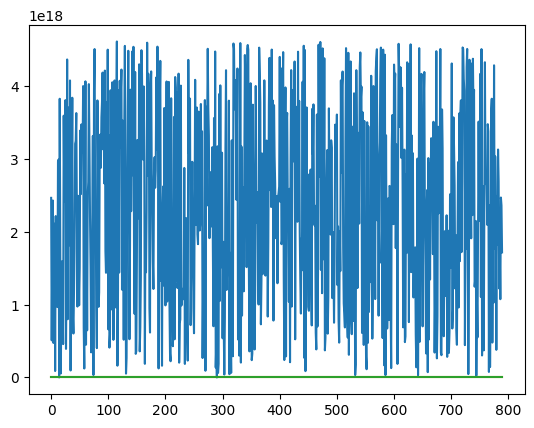

In [9]:
x = torch.arange(0.1, 8, 0.01)
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nInverse Square Root: (LUT faster)")
print("  Exact :", x.sqrt().reciprocal()[:print_terms])
with cfg.temp_override({"functions.sqrt_method": 'NR', "functions.inv_sqrt_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sqrt().reciprocal(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'haar', "functions.inv_sqrt_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt().reciprocal(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'bior', "functions.inv_sqrt_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt().reciprocal(), z_enc)

torch.Size([2000])

Sin:
  Exact : tensor([0.5440, 0.5356, 0.5271, 0.5186, 0.5100, 0.5014, 0.4927, 0.4840, 0.4752,
        0.4664, 0.4575, 0.4486, 0.4397, 0.4307, 0.4216, 0.4125, 0.4034, 0.3942])
  Approx: 1 iterations in 0.011347584000759525 sec.: tensor([0.5629, 0.5498, 0.5348, 0.5348, 0.5211, 0.5058, 0.5058, 0.4916, 0.4759,
        0.4759, 0.4603, 0.4456, 0.4456, 0.4318, 0.4318, 0.4173, 0.4012, 0.4012])
  Diff: tensor(0.0174) tensor(0.0506)
  Haar  : 1 iterations in 0.011113541997474385 sec.: tensor([0.5325, 0.5325, 0.5325, 0.5058, 0.5058, 0.5058, 0.5058, 0.4786, 0.4786,
        0.4786, 0.4509, 0.4509, 0.4509, 0.4228, 0.4228, 0.4228, 0.3943, 0.3943])
  Diff: tensor(0.0051) tensor(0.0156)
  Bior  : 1 iterations in 0.004396249998535495 sec.: tensor([35724, 35142, 34560, 33978, 33396, 32815, 32233, 31651, 31070, 30488,
        29906, 29325, 28742, 28161, 27579, 26997, 26416, 25834])
  Diff: tensor(40373.5625) tensor(65827.)


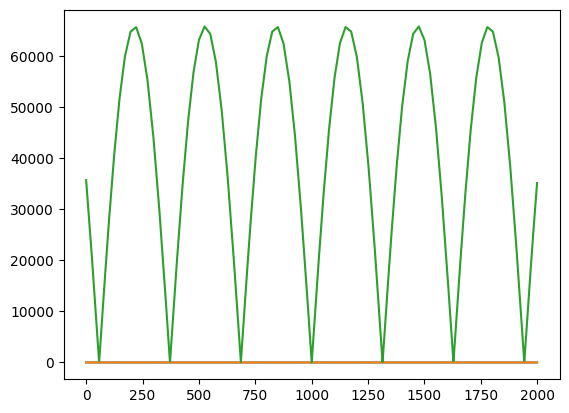

In [10]:
x = torch.arange(-10, 10, 0.01)
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nSin:")
print("  Exact :", x.sin()[:print_terms])
with cfg.temp_override({"functions.trigonometry_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sin(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sin(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sin(), z_enc)


Cos:
  Exact : tensor([-0.8391, -0.8445, -0.8498, -0.8550, -0.8602, -0.8652, -0.8702, -0.8751,
        -0.8799, -0.8846, -0.8892, -0.8937, -0.8982, -0.9025, -0.9068, -0.9109,
        -0.9150, -0.9190])
  Approx: 1 iterations in 0.022791708001022926 sec.: tensor([  783899830299656193,                    0,  1612246885958481921,
         1612246885958481921,                    0,  1735939279147180033,
         1735939279147180033,                    0, -7671368801160513535,
        -7671368801160513535,                    0,  5201109175138025473,
         5201109175138025473,                    0,                    0,
         8280479064625428481,                    0,                    0])
  Diff: tensor(2.2285e+18) tensor(9.2121e+18)
  Haar  : 1 iterations in 0.010880166999413632 sec.: tensor([-55469, -55469, -55469, -56533, -56533, -56533, -56533, -57541, -57541,
        -57541, -58492, -58492, -58492, -59387, -59387, -59387, -60224, -60224])
  Diff: tensor(42886.3477) tensor(65532

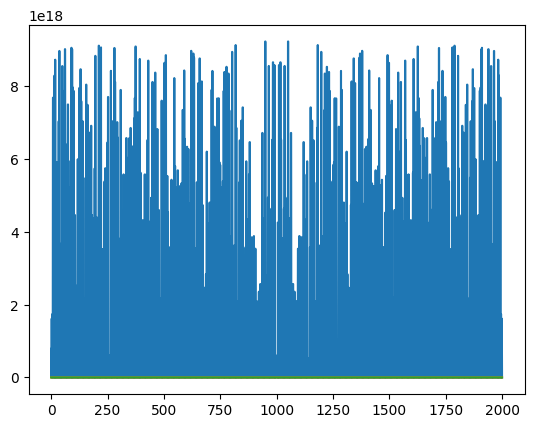

In [11]:
print("\nCos:")
print("  Exact :", x.cos()[:print_terms])
with cfg.temp_override({"functions.trigonometry_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.cos(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.cos(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.cos(), z_enc)


Sigmoid:
  Exact : tensor([4.5398e-05, 4.5854e-05, 4.6315e-05, 4.6780e-05, 4.7251e-05, 4.7725e-05,
        4.8205e-05, 4.8689e-05, 4.9179e-05, 4.9673e-05, 5.0172e-05, 5.0676e-05,
        5.1186e-05, 5.1700e-05, 5.2220e-05, 5.2744e-05, 5.3274e-05, 5.3810e-05])
  Approx: 1 iterations in 0.010493750000023283 sec.: tensor([ 4764484305846796289,                    0, -5914230724394766335,
         8387430751912579073,                    0,                    0,
        -2973380853435260927,  6409408328818116609,                    0,
         7607833125336772609,  2234097141673474049,                    0,
                           0,    53758244453918721, -1631117809104177151,
                           0,                    0,  7749037926905595905])
  Diff: tensor(2.4030e+18) tensor(9.2122e+18)
  Haar  : 1 iterations in 0.03899179099971661 sec.: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  Diff: tensor(16.5168) tensor(32895.5000)
  Bior  : 1 iterations in 0.007058208

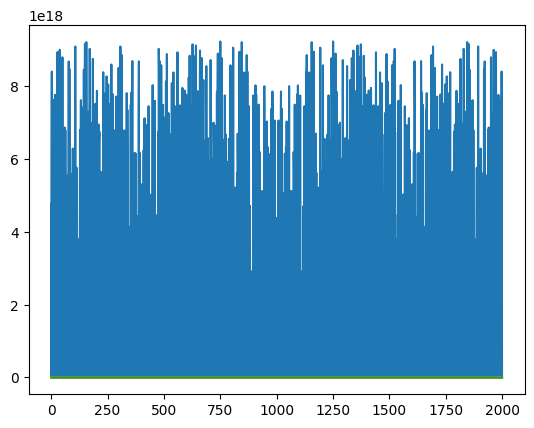

In [12]:
print("\nSigmoid:")
print("  Exact :", x.sigmoid()[:print_terms])
with cfg.temp_override({"functions.sigmoid_tanh_method": 'reciprocal', "functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sigmoid(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sigmoid(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sigmoid(), z_enc)

Tanh:
  Exact : tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.])
  Approx: 1 iterations in 0.011648707997665042 sec.: tensor([-8397794536156299263,  7506276718045782017,                   -1,
        -6696752952655331327,                   -1,  3138216533497180161,
                          -1, -6446406436140847103,                   -1,
                          -1, -3366737014377304063,                   -1,
         -957840367826305023,                   -1,  2941324442544939009,
                          -1,  6028055021751865345, -1720301197708173311])
  Diff: tensor(2.3490e+18) tensor(9.2100e+18)
  Haar  : 1 iterations in 0.03337895799995749 sec.: tensor([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
  Diff: tensor(0.3248) tensor(512.)
  Bior  : 1 iterations in 0.006618333001824794 sec.: tensor([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
  Diff: tensor(0.0823) tensor(

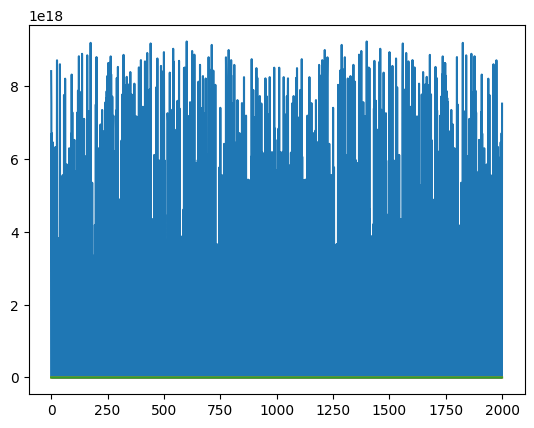

In [13]:
print("Tanh:")
print("  Exact :", x.tanh()[:print_terms])
with cfg.temp_override({"functions.sigmoid_tanh_method": 'reciprocal', "functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.tanh(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.tanh(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.tanh(), z_enc)

torch.Size([200])
Erf:
  Exact : tensor([-0.8427, -0.8385, -0.8342, -0.8299, -0.8254, -0.8209, -0.8163, -0.8116,
        -0.8068, -0.8019, -0.7969, -0.7918, -0.7867, -0.7814, -0.7761, -0.7707,
        -0.7651, -0.7595])
  Approx: 1 iterations in 0.01398620799955097 sec.: tensor([-0.6081, -0.6174, -0.6259, -0.6337, -0.6407, -0.6471, -0.6528, -0.6579,
        -0.6624, -0.6663, -0.6696, -0.6725, -0.6747, -0.6765, -0.6779, -0.6787,
        -0.6791, -0.6791])
  Diff: tensor(0.0192) tensor(0.2346)
  Haar  : 1 iterations in 0.010865625001315493 sec.: tensor([-0.8459, -0.8394, -0.8327, -0.8327, -0.8258, -0.8187, -0.8187, -0.8114,
        -0.8039, -0.8039, -0.7961, -0.7881, -0.7881, -0.7799, -0.7799, -0.7715,
        -0.7629, -0.7629])
  Diff: tensor(0.0033) tensor(0.0088)
  Bior  : 1 iterations in 0.004331625001213979 sec.: tensor([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
  Diff: tensor(0.6639) tensor(31.)


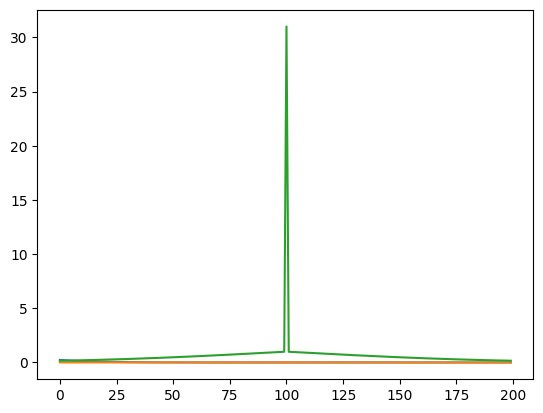

In [14]:
x = torch.arange(-1, 1, 0.01)
print(x.size())
x_enc = crypten.cryptensor(x)

print("Erf:")
print("  Exact :", x.erf()[:print_terms])
with cfg.temp_override({"functions.erf_method": 'Taylor'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.erf(), z_enc)
with cfg.temp_override({"functions.erf_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.erf(), z_enc)
with cfg.temp_override({"functions.erf_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.erf(), z_enc)

#### Advanced mathematics
We are also able to compute more advanced mathematical functions on ```CrypTensors``` using iterative approximations. CrypTen provides MPC support for functions like reciprocal, exponential, logarithm, square root, tanh, etc. Notice that these are subject to numerical error due to the approximations used. 

Additionally, note that some of these functions will fail silently when input values are outside of the range of convergence for the approximations used. These do not produce errors because value are encrypted and cannot be checked without decryption. Exercise caution when using these functions. (It is good practice here to normalize input values for certain models.)